In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from collections import Counter

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\91730\\Desktop'

In [4]:
netflix_dataframe = pd.read_csv('netflix_titles.csv')

In [5]:
# Checking null values
netflix_dataframe.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# Data cleaning
netflix_dataframe['director'].replace(np.nan,"Unknown",inplace=True)
netflix_dataframe['cast'].replace(np.nan,"Unknown",inplace=True)
netflix_dataframe.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [7]:
netflix_dataframe['country'].value_counts().to_frame().head(1)

,count
country,
United States,2818


In [8]:
netflix_dataframe['country'].replace(np.nan,"United States",inplace=True)
     

In [9]:
# We follow the same approach for 'date_added'.
netflix_dataframe['date_added'].value_counts().to_frame().head(1)

,count
date_added,
"January 1, 2020",109


In [10]:
netflix_dataframe['date_added'].replace(np.nan,"January 1,2020",inplace=True)

Release month is important for visualizing our data, so let's separate the month from the date_added column, create a new column for release months only and concat it to our dataframe.

In [11]:
netflix_date = netflix_dataframe['date_added'].apply(lambda x: x.lstrip().split(" ")[0]).to_frame()
netflix_date.rename(columns = {'date_added' : 'release_month'}, inplace = True)

In [12]:
netflix_df_new = pd.concat([netflix_dataframe,netflix_date],axis=1)
netflix_df_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September


Lets clean the rating column.

In [13]:
netflix_df_new["rating"].isnull().sum()

4

In [14]:
netflix_df_new['rating'].value_counts().to_frame().head(1)

,count
rating,
TV-MA,3207


Rating column has only 4 null values let's replace the null values with TV-MA since they make up the most amount of Ratings.

In [15]:
netflix_df_new["rating"].replace(np.nan,"TV-MA",inplace=True)
netflix_df_new.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         3
listed_in        0
description      0
release_month    0
dtype: int64

In [16]:
# eliminating null values of duration column
netflix_df_new["duration"].replace(np.nan,0,inplace=True)

In [17]:
netflix_df_new.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
release_month    0
dtype: int64

We eliminated all Null values

# Visualization

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


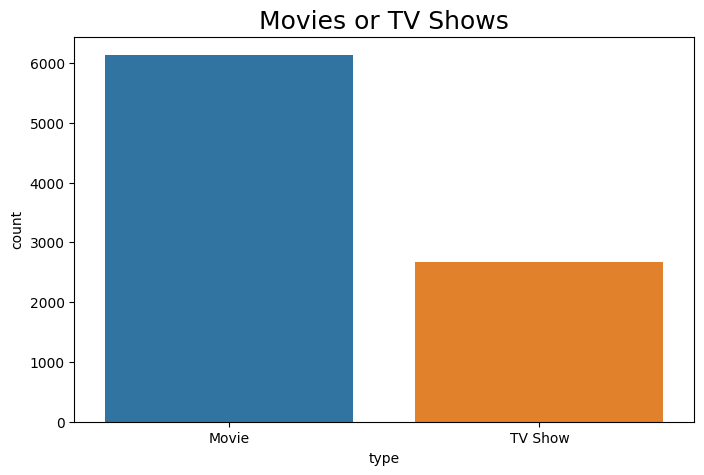

In [18]:
print(netflix_dataframe['type'].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(x='type', data=netflix_dataframe, order=netflix_dataframe.type.value_counts().index[0:2])
plt.title('Movies or TV Shows', size=18);

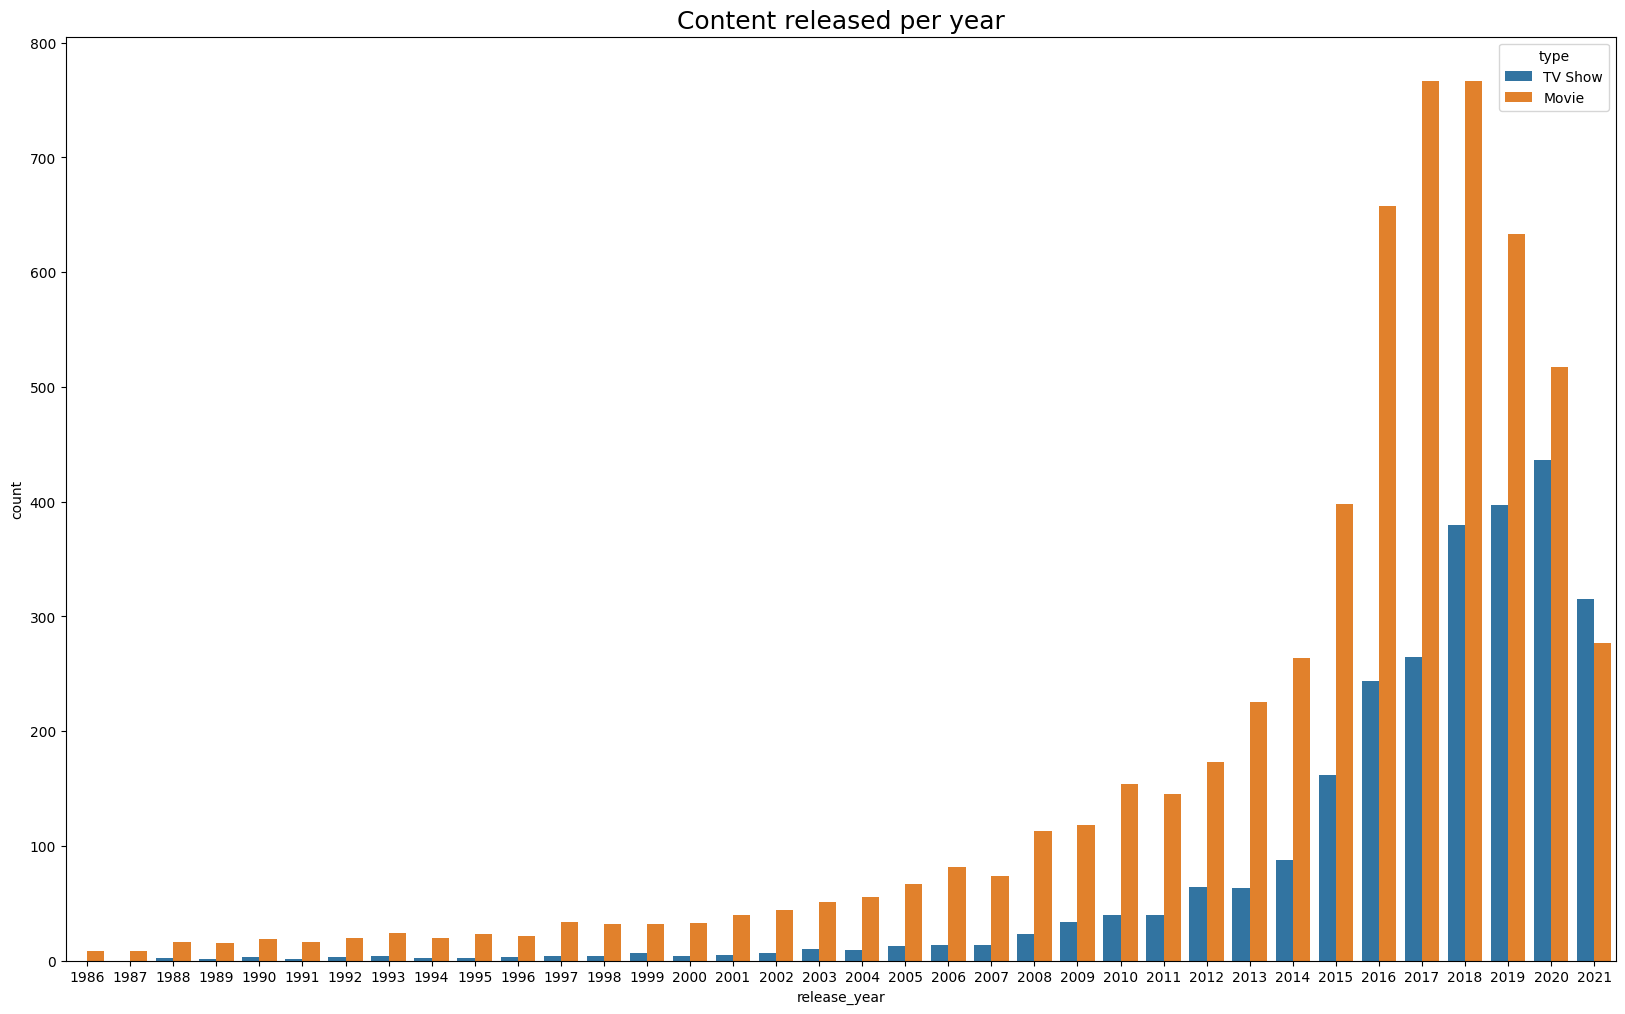

In [19]:

plt.figure(figsize=(20,12))
sns.countplot(x='release_year',hue='type', data=netflix_dataframe.sort_values(by='release_year')[-1:200:-1]);
plt.title('Content released per year', size=18);

So, 2017 was the year when most of the movies were released. We can also observe that Netflix after the year 2018 is mostly concerned in producing more TV Shows. This is very clear in the year 2020 in which we see that TV Show production surmounted the Movie production. It is clear that Netflix is lately investing in producing more TV Shows than older years.

Top  1  country/countries with most content: {'United States': 3649}


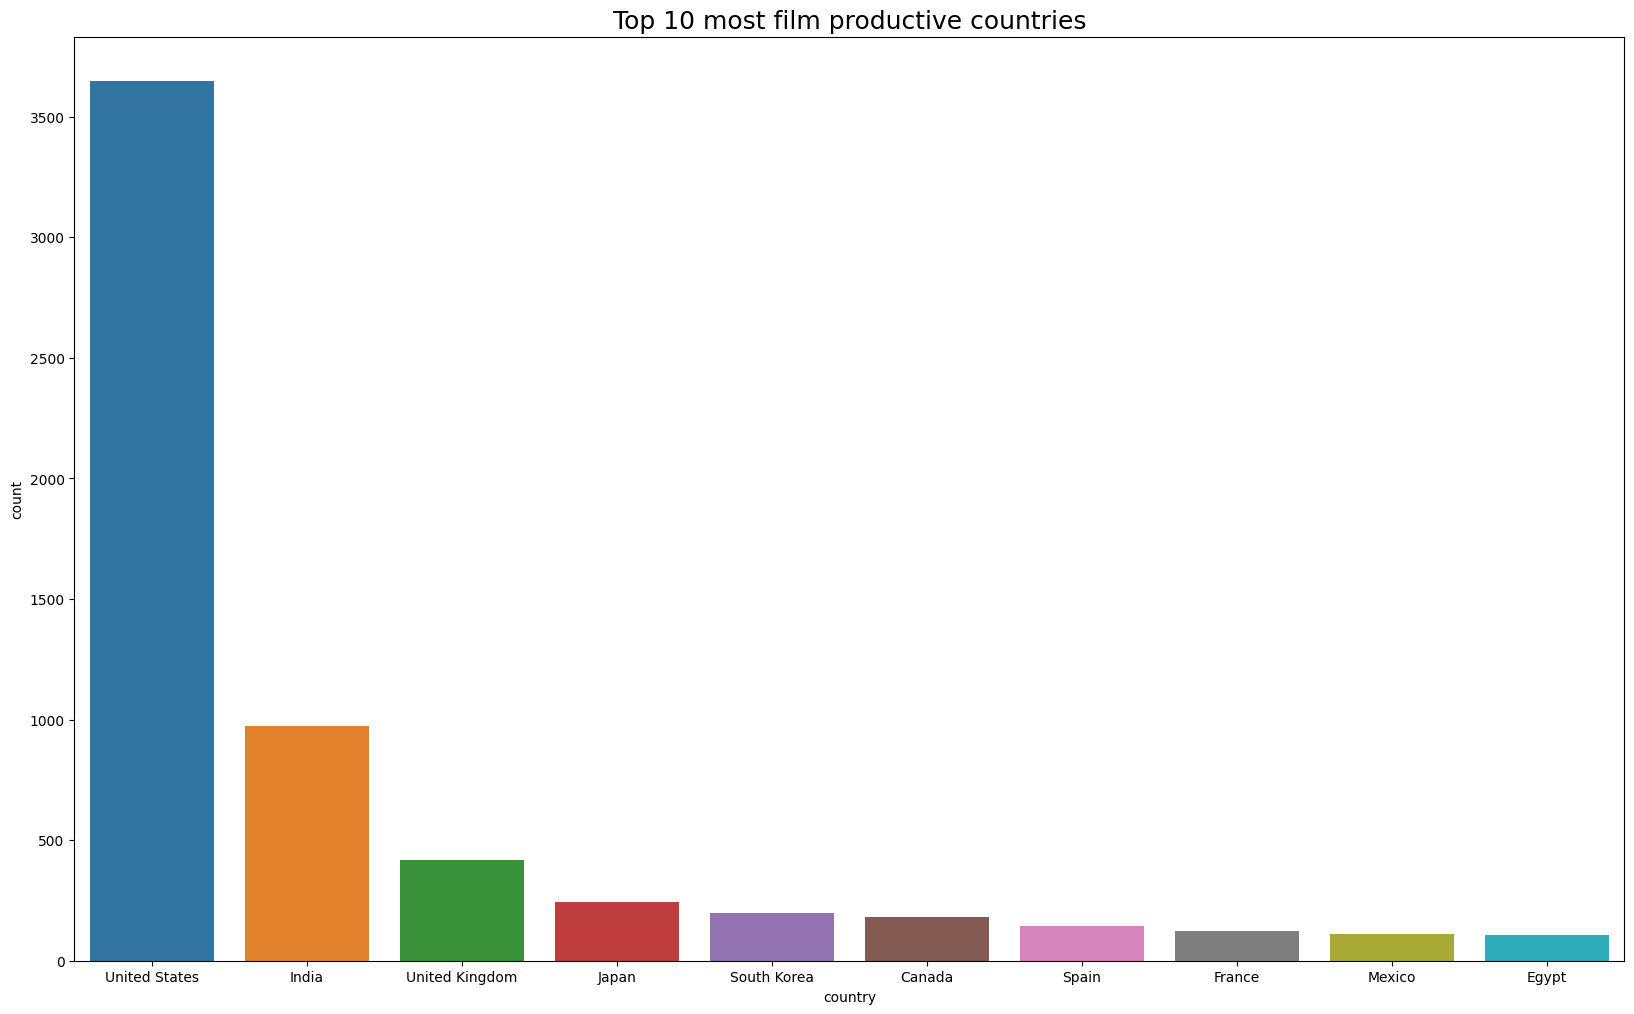

In [20]:
def return_counter(data_frame, column_name, limit):
  print('Top ', limit, ' country/countries with most content:', dict(Counter(data_frame[column_name].values).most_common(limit)))

return_counter(netflix_dataframe, 'country', 1)

## Frequency graph by country
plt.figure(figsize=(20,12))
sns.countplot(x='country', data=netflix_dataframe, order=netflix_dataframe.country.value_counts().index[0:10])
plt.title('Top 10 most film productive countries', size=18);

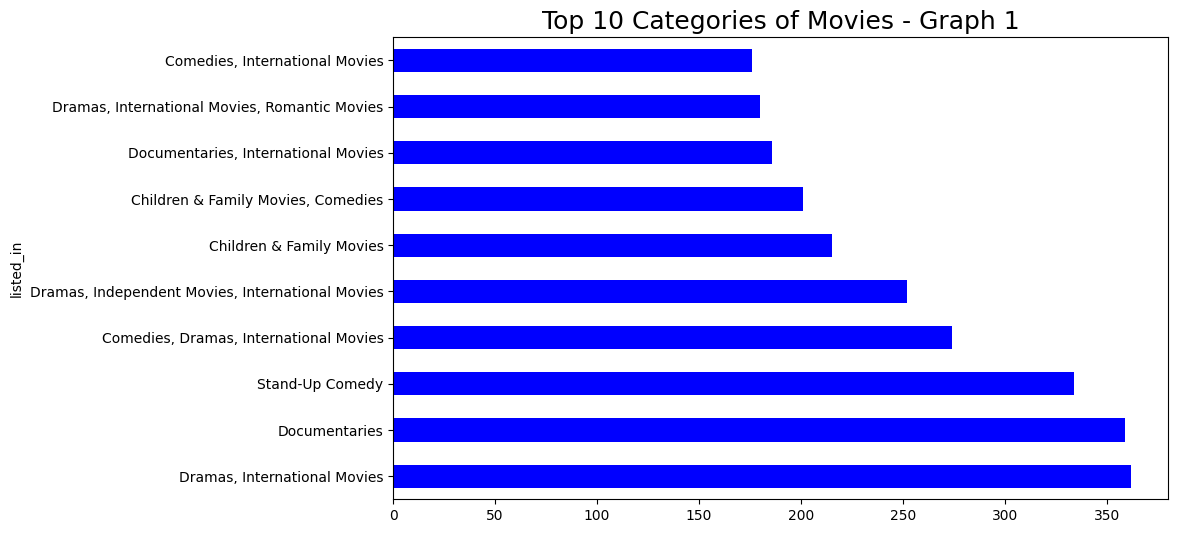

In [21]:
# We will look at which Genres are the most popular for Movies...
plt.figure(figsize=(10,6))
netflix_df_new[netflix_df_new["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="blue")
plt.title("Top 10 Categories of Movies - Graph 1",size=18);

The data shows that Documentaries is the largest category of movies.

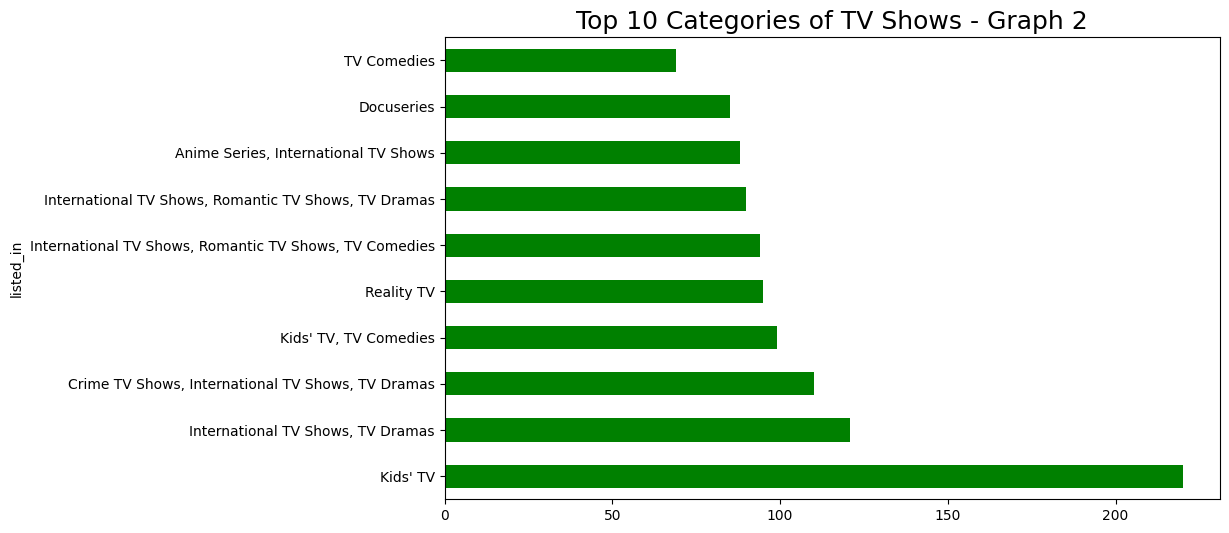

In [22]:
# and for TV Shows...
plt.figure(figsize=(10,6))
netflix_df_new[netflix_df_new["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="green")
plt.title("Top 10 Categories of TV Shows - Graph 2",size=18);

The data shows that Kids' Shows is by far the largest category of shows. The very high number of Kids TV shows may also be attributed to the fact that this type of content is cheaper to licence.

In [23]:

# And then calculate what content does each country provide.
df_new = netflix_df_new.groupby(netflix_df_new["listed_in"])["country"].value_counts()
# Show only the top 20 most produced genres per counrty.
df_new.sort_values(ascending=False).head(20).to_frame()

,,count
listed_in,country,
Documentaries,United States,265
Stand-Up Comedy,United States,240
Children & Family Movies,United States,150
Kids' TV,United States,121
"Comedies, Dramas, International Movies",India,120
"Dramas, International Movies",India,118
"Children & Family Movies, Comedies",United States,110
"Dramas, Independent Movies, International Movies",India,108
Dramas,United States,90


As expected due to Graph 1 the most produced gerne are documentaries by the United States. Next up are Stand-Up Comedies and Children & Family Shows also by the US. Then comes India with Drama, International Movies and Comedies, Dramas, International Movies. As expected again due to Graph 2 next up is Kids' TV from US. The list goes on and shows all the content that each country provides. The data is so much that we had to present it in a list and not in a graph form for readability reasons.

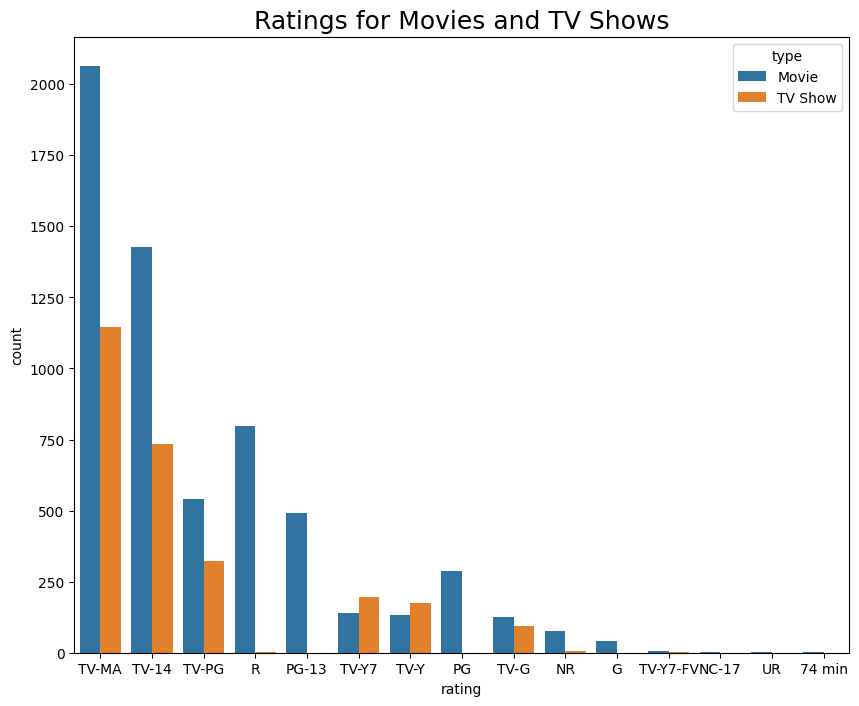

In [24]:
plt.figure(figsize = (10,8))
# First plot every rating for movies and tv shows
sns.countplot(x="rating",data= netflix_df_new, hue= "type", order = netflix_df_new['rating'].value_counts().index[0:15])
plt.title('Ratings for Movies and TV Shows', size=18);

As shown above the Movies & TV Shows with a rating of TV-MA are in the clear majority. Next up is TV-14, TV-PG and R, which consists mostly of Movies.

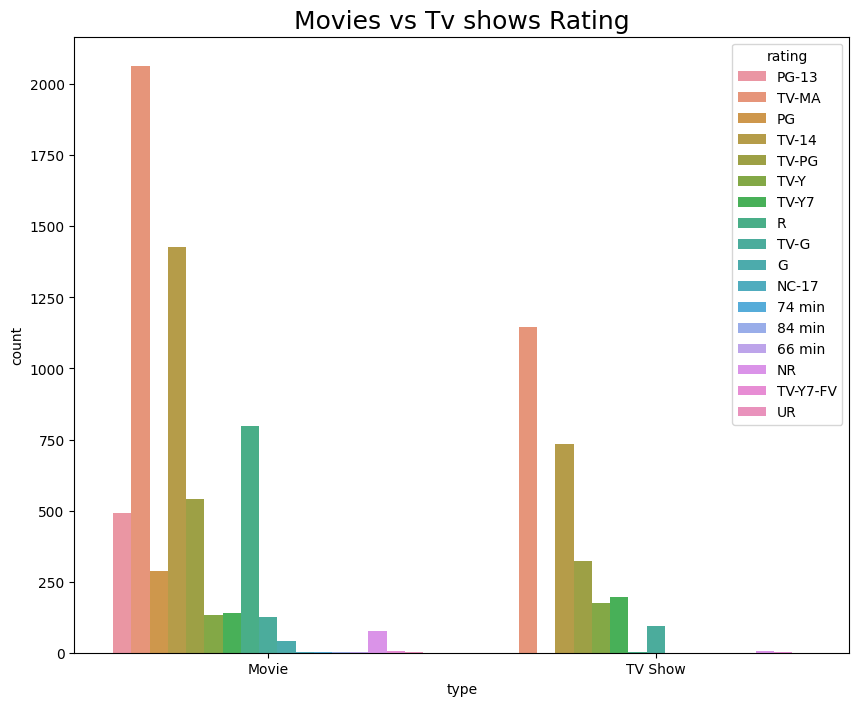

In [25]:
plt.figure(figsize=(10,8))
# Then differentiate the ratings for Movies and TV Shows
sns.countplot(x='type',hue='rating',data=netflix_df_new)
plt.title("Movies vs Tv shows Rating", size=18);

<Axes: xlabel='type'>

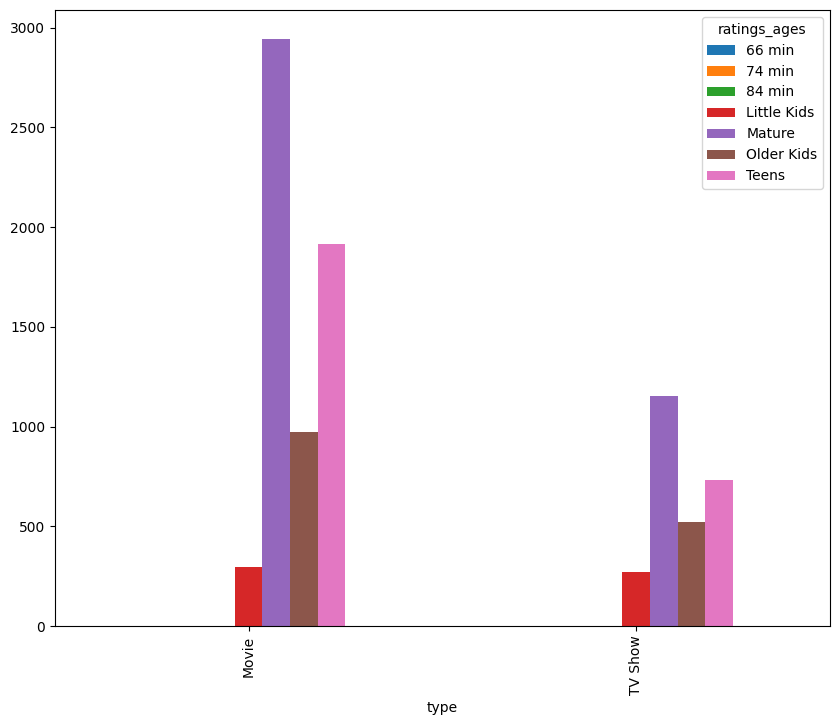

In [26]:
# Creating a dictionary for ratings.
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Mature',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Mature',
    'TV-Y': 'Little Kids',
    'NR': 'Mature',
    'PG-13': 'Teens',
    'TV-G': 'Little Kids',
    'PG': 'Older Kids',
    'G': 'Little Kids',
    'UR': 'Mature',
    'NC-17': 'Mature'
}

# Add a new column 'rating_ages' to our dataframe based on the above dictionary
netflix_df_new["ratings_ages"] = netflix_df_new["rating"].replace(ratings_ages)

pd.crosstab(netflix_df_new["type"],netflix_df_new["ratings_ages"]).plot(kind="bar", figsize=(10,8))

It is clear that Netflix produces more mature content both in Movies and in TV Shows. Next up is content that is dedicated for Teenagers. Older Kids and Little Kids come in last place. This graph shows that Netflix does not provide a wide variety of movies for all ages and it tends to release more mature content. When it comes to the TV Shows, however, Netflix provides content available for all ages and tries to keep a balance between the different age groups.

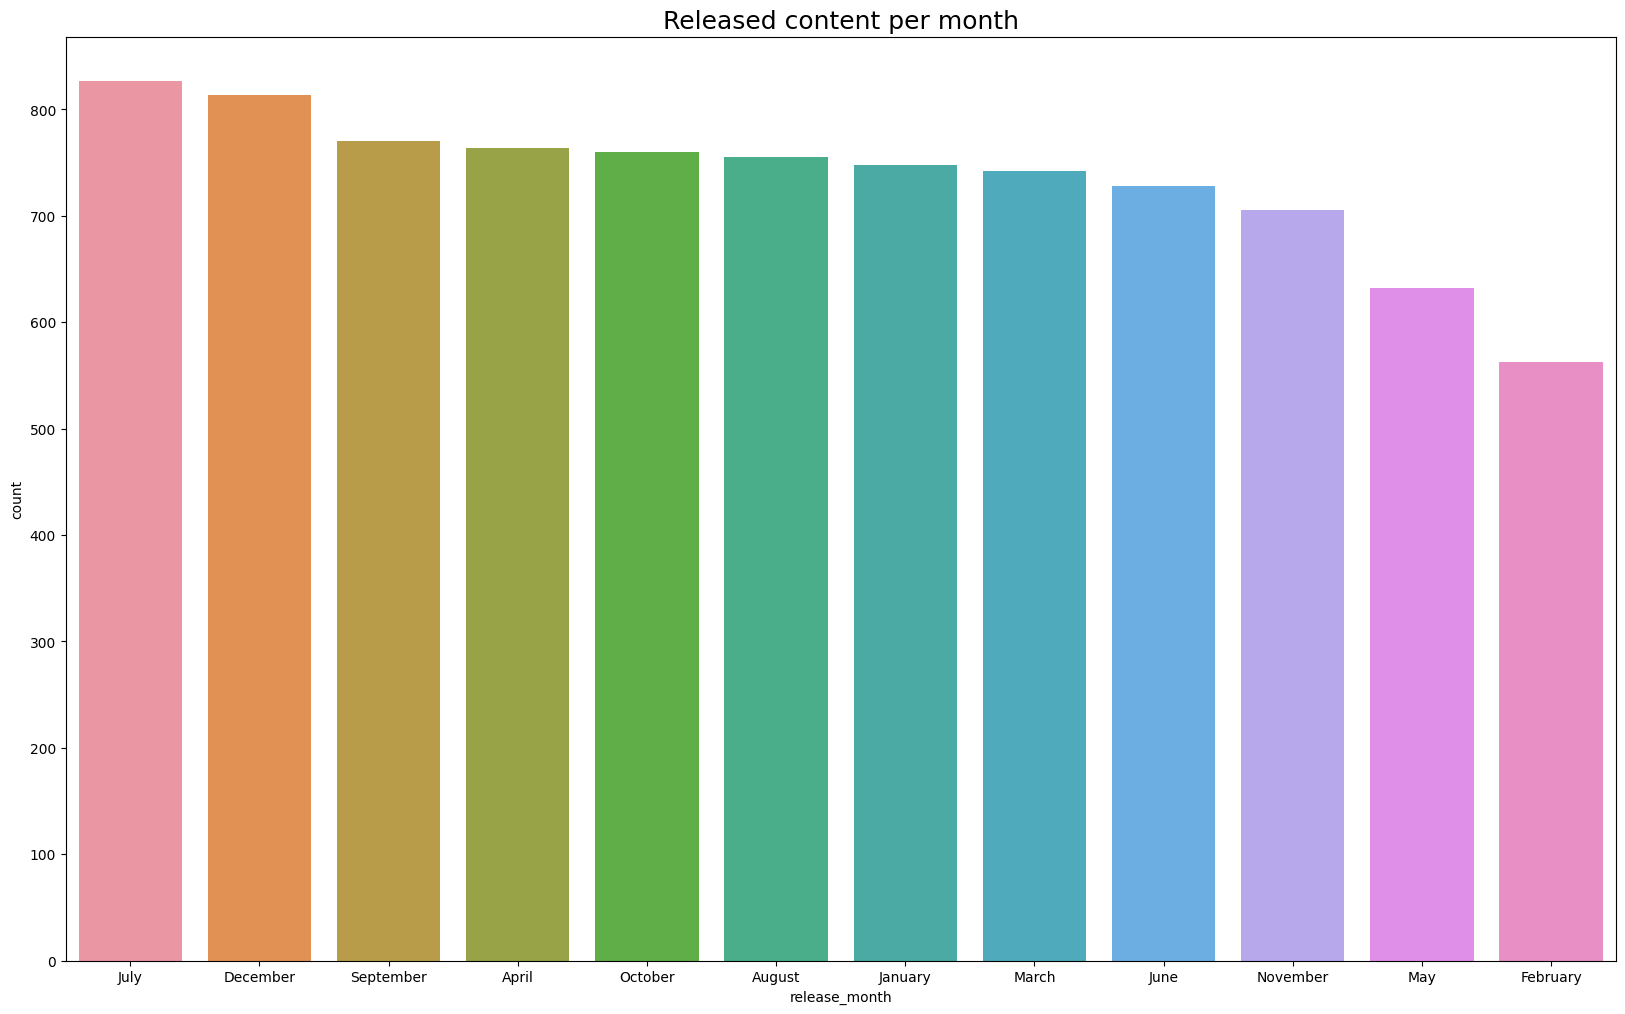

In [27]:
plt.figure(figsize=(20,12))
sns.countplot(x='release_month', data=netflix_df_new, order=netflix_df_new['release_month'].value_counts().index[0:12])
plt.title('Released content per month', size=18);
     

As we can observe the most content is being released during the month of December. That could be due to the fact that during the month of December is the holiday season.

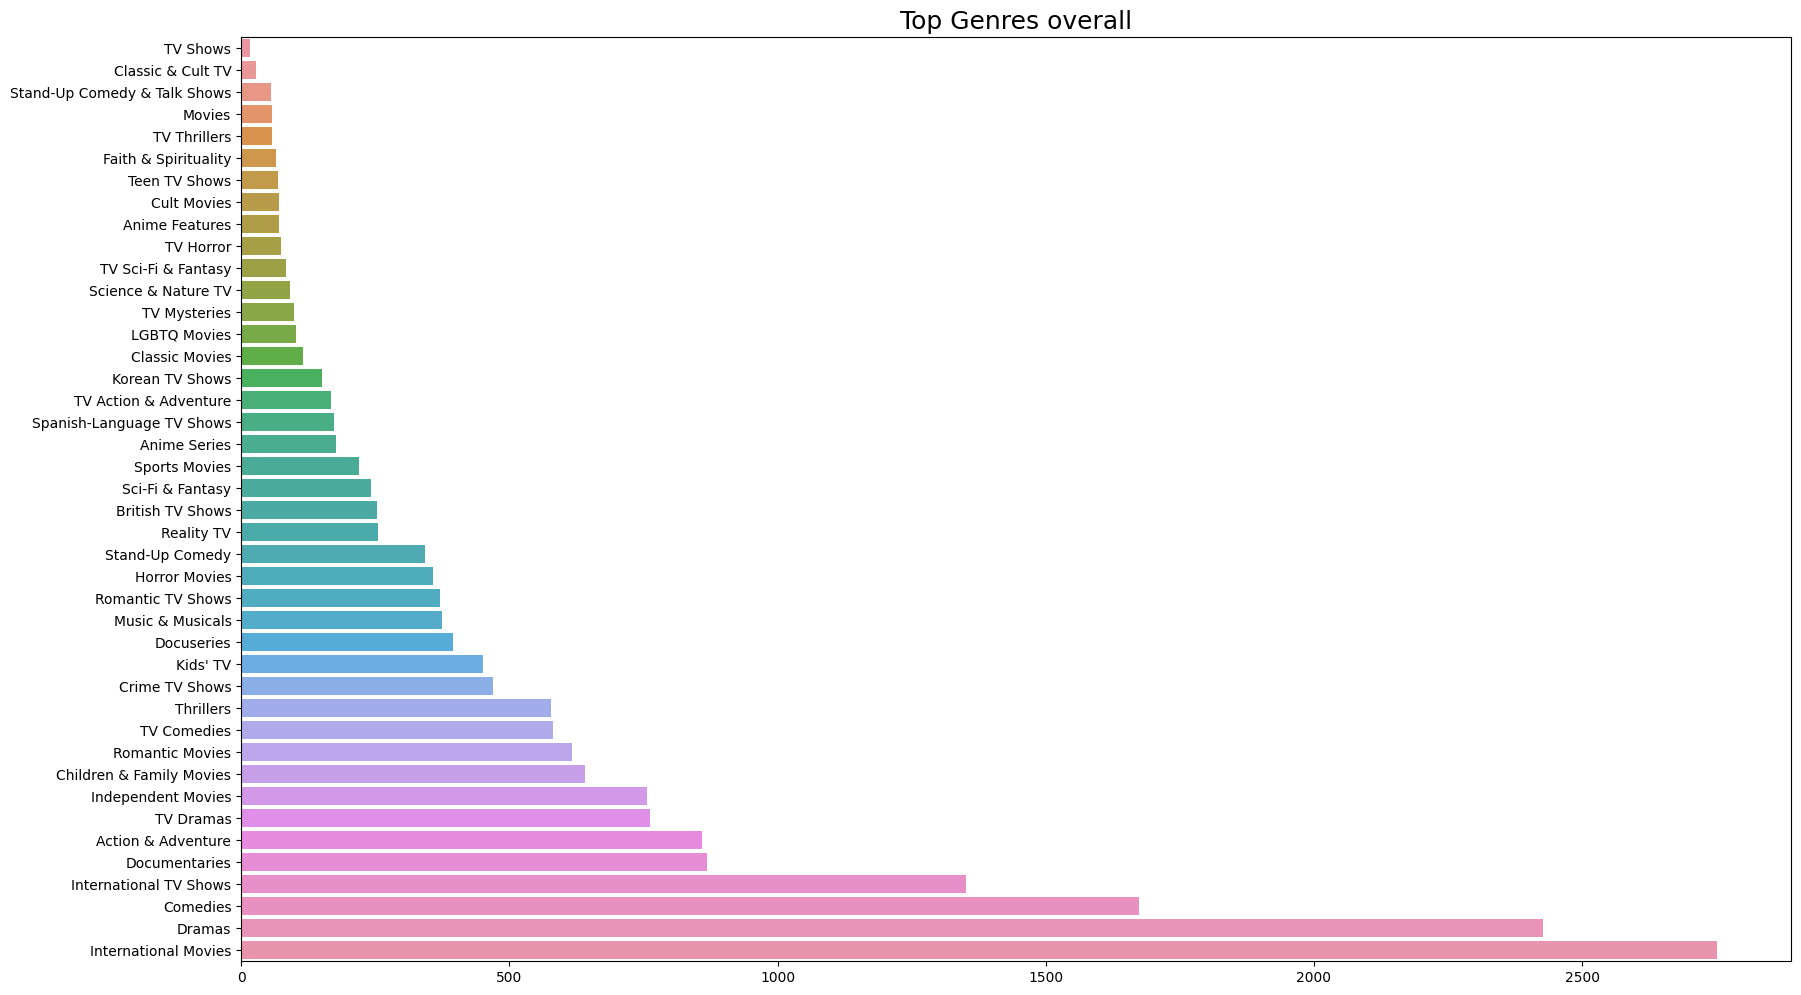

In [28]:
categories = ", ".join(netflix_df_new['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]

plt.figure(figsize=(20,12))
sns.barplot(y=labels, x=values)
plt.title('Top Genres overall', size=18);

It is clear that International Movies is the most common genre used in Netflix content. This actually makes sense given the fact that Netflix has many countries producing content and cooperating with each other.